In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt

In [5]:
# Generate synthetic dataset
np.random.seed(42)
n_samples = 200
X = np.random.rand(n_samples, 2) * 10
y = (X[:, 0] * 1.5 + X[:, 1] > 15).astype(int)

# Create Dataframe
df = pd.DataFrame(X, columns=["Age", "Salary"])
df["Purchase"] = y

# Split Data
X_train, X_test, y_train, y_test = train_test_split(df[["Age", "Salary"]], df["Purchase"], test_size=0.2, random_state=42)

# Training
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Probabilities of 0 and 1. First column is 0, second column is 1
print(logistic_model.predict_proba(X_test))

# Predicting
y_pred = logistic_model.predict(X_test)

# Evaluate the Model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print("Classification Score:\n", classification_report(y_test, y_pred))

[[9.99461546e-01 5.38453785e-04]
 [9.98865454e-01 1.13454642e-03]
 [9.99971682e-01 2.83175041e-05]
 [9.99990525e-01 9.47530313e-06]
 [5.97720591e-05 9.99940228e-01]
 [4.09259500e-02 9.59074050e-01]
 [4.34701943e-01 5.65298057e-01]
 [9.90934817e-01 9.06518286e-03]
 [9.93772846e-01 6.22715360e-03]
 [9.99947850e-01 5.21495399e-05]
 [9.99999880e-01 1.19690592e-07]
 [7.88727056e-03 9.92112729e-01]
 [9.67341280e-01 3.26587196e-02]
 [1.25649348e-02 9.87435065e-01]
 [9.99982668e-01 1.73319001e-05]
 [9.99994975e-01 5.02492293e-06]
 [1.13848242e-05 9.99988615e-01]
 [1.06582891e-04 9.99893417e-01]
 [9.99815456e-01 1.84544255e-04]
 [5.78206649e-01 4.21793351e-01]
 [2.41095795e-06 9.99997589e-01]
 [9.99371697e-01 6.28302564e-04]
 [8.90392911e-01 1.09607089e-01]
 [1.04492610e-02 9.89550739e-01]
 [9.99974338e-01 2.56619586e-05]
 [5.36097202e-05 9.99946390e-01]
 [9.99998943e-01 1.05664088e-06]
 [2.08153638e-02 9.79184636e-01]
 [9.99981946e-01 1.80541254e-05]
 [1.21016050e-04 9.99878984e-01]
 [9.998880

D:\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


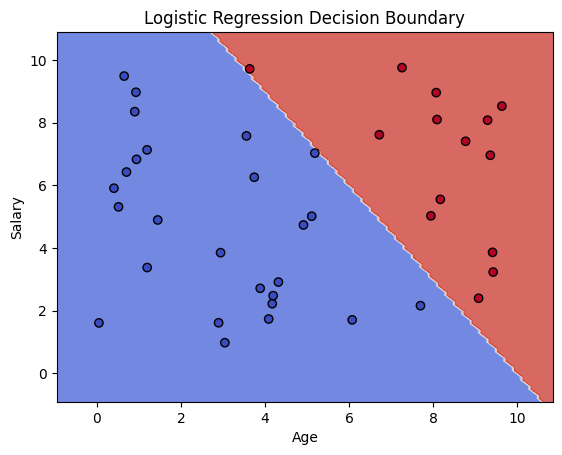

In [4]:
# Plot Decision Boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict probabilities for grid points
Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.contourf(xx, yy, Z, alpha=0.8, cmap="coolwarm")
plt.scatter(X_test["Age"], X_test["Salary"], c=y_test, edgecolor="k", cmap="coolwarm")
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()